In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels
import matplotlib.pyplot as plt
%matplotlib inline


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Advertising.csv
Auto.csv
Auto.data.txt
Ch10Ex11.csv
College.csv
Credit.csv
Heart.csv
Income1.csv
Income2.csv



In [4]:
advertising_data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [263]:
advertising_data.head()[['TV', 'Sales']]

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [264]:
# conducting linear regression
import statsmodels.formula.api as sm
res = sm.ols("Sales ~ TV", advertising_data).fit()


In [265]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           1.47e-42
Time:                        18:44:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [266]:
len(advertising_data)

200

In [267]:
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# carry out yr fit

# ols cinv
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(res, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

# wls cinv
prstd, iv_l, iv_u = wls_prediction_std(res)

# plot OLS
# cil, = plt.plot(advertising_data["TV"],predict_ci_low, 'r--', lw=1, alpha=0.5)
# ciu, = plt.plot(advertising_data["TV"],predict_ci_upp, 'r--', lw=1, alpha=0.5)
# mcil, = plt.plot(advertising_data["TV"],predict_mean_ci_low, 'b--', lw=1, alpha=0.5)
# mciu, = plt.plot(advertising_data["TV"],predict_mean_ci_upp, 'b--', lw=1, alpha=0.5)

# plot WLS
# wciu, = plt.plot(advertising_data["TV"], iv_u, 'r--', lw=1, alpha=0.5)
# wcil, = plt.plot(advertising_data["TV"], iv_l, 'r--', lw=1, alpha=0.5)

In [268]:
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,22.1,17.9707745128,0.3209911679,17.3377743194,18.6037747061,11.5135458897,24.4280031358,4.12922548723,3.24280835065,1.27334860427,0.00794343302167
2.0,10.4,9.1479740484,0.359466121714,8.43910057369,9.85684752311,2.68286663637,15.6130814604,1.2520259516,3.23876912365,0.386574622582,0.00092043396647
3.0,9.3,7.85022376458,0.418501179336,7.02493212443,8.67551540472,1.37131810566,14.3291294235,1.44977623542,3.23167109896,0.448615032604,0.00168755024544
4.0,18.5,14.2343945747,0.230733716317,13.7793836534,14.689405496,7.79217855969,20.6766105898,4.26560542527,3.2504773928,1.31230121296,0.00433875260405
5.0,12.9,15.6272181394,0.247677135601,15.1387944992,16.1156417797,9.18255601497,22.0718802639,-2.72721813942,3.24923027276,-0.83934283214,0.00204672562679
6.0,7.2,7.44616232089,0.437773799039,6.58286473785,8.30945990394,0.962305832448,13.9300188093,-0.246162320895,3.22911681886,-0.0762320890522,5.34044767361e-05
7.0,11.8,9.76595037403,0.333374313692,9.10853040076,10.4233703473,3.30628217302,16.225618575,2.03404962597,3.24155871394,0.627491218107,0.00208229277966
8.0,13.2,12.7464977292,0.241475286481,12.2703042438,13.2226912146,6.30275095564,19.1902445027,0.453502270823,3.24969706511,0.139552168014,5.37653904009e-05
9.0,4.8,7.44140865685,0.438002595821,6.57765988256,8.30515743115,0.957492078812,13.9253252349,-2.64140865685,3.22908579245,-0.818005103187,0.00615568278417


In [269]:
np.sqrt(res.mse_resid)

3.2586563686504624

In [270]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

pred = res.predict(exog={"TV":100})
_, pred_low, pred_high = wls_prediction_std(res, exog=[1,100], weights=1)



In [311]:
se

array([ 3.26924398])

In [272]:
print(pred_low, pred_hi)

[ 5.33925132] [ 18.23326387]


In [273]:
pred_low

array([ 5.33925132])

In [274]:
res.cov_params().shape

(2, 2)

In [275]:
st, data, ss2 = summary_table(res, alpha=0.05)

In [276]:
tv_bar = np.average(advertising_data['TV'])
tv_s = np.std(advertising_data['TV'])

In [277]:
tv_bar

147.04249999999999

In [278]:
from scipy import stats

x = 1 + 1/len(advertising_data) + (pow(100-tv_bar,2)/((len(advertising_data)-1)*pow(tv_s,2)))
conf_low = pred - stats.t.ppf(1-0.025, 198) * se*pow(x, 0.5)
conf_hi = pred + stats.t.ppf(1-0.025, 198) * se*pow(x, 0.5)

In [279]:
print(conf_low, conf_hi)

[ 5.31828015] [ 18.25423503]


In [280]:
from scipy import stats

x = 1/len(advertising_data) + (pow(100-tv_bar,2)/((len(advertising_data)-1)*pow(tv_s,2)))
conf_low = pred - stats.t.ppf(1-0.025, 198) * se*pow(x, 0.5)
conf_hi = pred + stats.t.ppf(1-0.025, 198) * se*pow(x, 0.5)

In [281]:
print(conf_low, conf_hi)

[ 11.26583257] [ 12.30668261]


In [282]:
data[:,4:6].T

array([[ 17.33777432,   8.43910057,   7.02493212,  13.77938365,
         15.1387945 ,   6.58286474,   9.1085304 ,  12.27030424,
          6.57765988,  15.99671509,   9.54952621,  16.6596194 ,
          7.36767363,  11.14246309,  16.18881018,  15.79942027,
          9.63649964,  19.5640115 ,   9.70807175,  13.58034281,
         16.82313426,  17.65724014,   6.81698752,  17.25882005,
          9.35486944,  18.76553539,  13.37065236,  17.77511885,
         18.15402805,   9.77959465,  20.05862888,  11.91030379,
         11.12740322,  18.88231723,  11.05205017,  19.96409477,
         18.93851293,   9.9887599 ,   8.36683196,  17.24565362,
         16.11741255,  14.96518367,  20.08869969,  16.31353748,
          7.43512586,  14.87809809,  10.74977862,  17.76639199,
         17.21053265,   9.59046357,  15.99671509,  11.28785299,
         16.7347972 ,  15.22077779,  18.75688116,  15.95642123,
          6.50998861,  13.04906083,  16.48682167,  16.4823847 ,
          8.90288594,  18.69628684,  17.

In [283]:
ci_low = data[:,4]
ci_hi = data[:,5]
pi_low = data[:,6]
pi_hi = data[:,7]

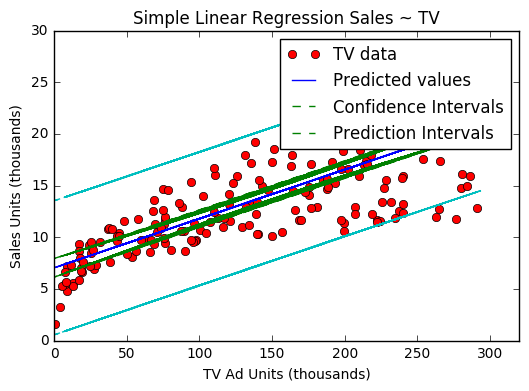

In [292]:
# let's plot the data and fit
# source: http://mpastell.com/2013/04/19/python_regression/

plt.plot(advertising_data["TV"], advertising_data['Sales'], 'ro')
plt.plot(advertising_data["TV"], res.fittedvalues, 'b')
plt.plot(advertising_data["TV"], ci_low, 'g--')
plt.plot(advertising_data["TV"], ci_hi, 'g--')
plt.plot(advertising_data["TV"], pi_low, 'c--')
plt.plot(advertising_data["TV"], pi_hi, 'c--')



plt.legend(['TV data', 'Predicted values', 'Confidence Intervals', 'Prediction Intervals'])
plt.xlim(0, 320)
plt.xlabel('TV Ad Units (thousands)')
plt.ylabel('Sales Units (thousands)')
plt.title('Simple Linear Regression Sales ~ TV')

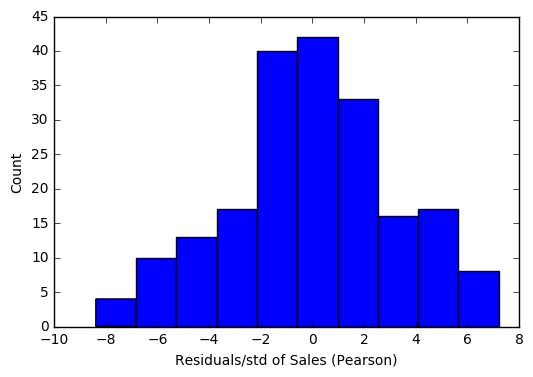

In [285]:
# closer look at the residuals
# TODO confidence bounds - R style
plt.hist(res.wresid)
plt.ylabel('Count')
plt.xlabel('Residuals/std of Sales (Pearson)')

In [286]:
# TODO clean up the extra cells generated
total = res
res.resid_pearson


array([ 1.26715585,  0.3842154 ,  0.44490001,  1.30900744, -0.83691492,
       -0.07554105,  0.62419887,  0.13916849, -0.81058214, -1.81989558,
       -0.48325607,  0.04949578,  0.317933  , -0.60375068,  0.69512642,
        1.86541514,  0.68875695,  1.22461388,  0.30008409,  0.17346392,
        0.17964588, -1.78533461, -0.63218608, -0.73196075, -0.09025998,
       -2.31076108,  0.36040024, -0.78134686,  0.01236409,  0.03416121,
        0.1362293 , -0.15327798, -0.63006183, -0.69302344, -0.63886762,
       -2.47080208,  1.74301199,  1.26322599,  0.31257584,  1.11366527,
       -0.01803297,  0.50739351, -0.08879463, -1.21765661,  0.0841564 ,
       -0.14001455, -0.21377835,  1.46175781, -0.93072663, -0.15736388,
       -1.57439562, -0.33918036,  1.62044624,  1.68388909,  0.20853104,
        2.21329525, -0.57680553, -0.09423638,  2.07038788,  0.41472195,
       -0.45288722,  1.45645376, -0.8310516 ,  0.63995501,  1.45316117,
       -0.31074824,  0.2976694 , -0.07808358,  0.17866505,  1.52

In [287]:
[x/rse for x in res.resid]

[0      0.017855
 1      0.092326
 2      0.238868
 3      0.027119
 4      0.022724
 5      0.472245
 6      0.071453
 7      0.034181
 8      0.477736
 9      0.020563
 10     0.062156
 11     0.019136
 12     0.172627
 13     0.042139
 14     0.020130
 15     0.021026
 16     0.060598
 17     0.014600
 18     0.059372
 19     0.027892
 20     0.018812
 21     0.017306
 22     0.311252
 23     0.017996
 24     0.065947
 25     0.015628
 26     0.028751
 27     0.017112
 28     0.016513
 29     0.058194
          ...   
 170    0.082171
 171    0.024976
 172    0.209619
 173    0.024397
 174    0.018474
 175    0.014838
 176    0.016540
 177    0.024139
 178    0.014848
 179    0.024810
 180    0.026236
 181    0.018803
 182    0.073105
 183    0.014286
 184    0.016188
 185    0.020042
 186    0.029452
 187    0.021499
 188    0.014365
 189    0.219707
 190    0.104013
 191    0.054418
 192    0.238868
 193    0.024631
 194    0.027445
 195    0.107553
 196    0.043615
 197    0.0232

In [288]:
# res.mse_total
res.resid_pearson

array([ 1.26715585,  0.3842154 ,  0.44490001,  1.30900744, -0.83691492,
       -0.07554105,  0.62419887,  0.13916849, -0.81058214, -1.81989558,
       -0.48325607,  0.04949578,  0.317933  , -0.60375068,  0.69512642,
        1.86541514,  0.68875695,  1.22461388,  0.30008409,  0.17346392,
        0.17964588, -1.78533461, -0.63218608, -0.73196075, -0.09025998,
       -2.31076108,  0.36040024, -0.78134686,  0.01236409,  0.03416121,
        0.1362293 , -0.15327798, -0.63006183, -0.69302344, -0.63886762,
       -2.47080208,  1.74301199,  1.26322599,  0.31257584,  1.11366527,
       -0.01803297,  0.50739351, -0.08879463, -1.21765661,  0.0841564 ,
       -0.14001455, -0.21377835,  1.46175781, -0.93072663, -0.15736388,
       -1.57439562, -0.33918036,  1.62044624,  1.68388909,  0.20853104,
        2.21329525, -0.57680553, -0.09423638,  2.07038788,  0.41472195,
       -0.45288722,  1.45645376, -0.8310516 ,  0.63995501,  1.45316117,
       -0.31074824,  0.2976694 , -0.07808358,  0.17866505,  1.52

In [19]:
res.ess

3314.618166868649

In [24]:
res.uncentered_tss

44743.25

In [130]:
rss

0      10589202.0
1        396050.0
2         59168.0
3       4590450.0
4       6537728.0
5         15138.0
6        661250.0
7       2889608.0
8         14792.0
9       7984008.0
10       873842.0
11      9219218.0
12       113288.0
13      1901250.0
14      8331362.0
15      7636232.0
16       919368.0
17     15837192.0
18       957728.0
19      4339458.0
20      9539712.0
21     11271752.0
22        34848.0
23     10424178.0
24       776258.0
25     13823282.0
26      4084082.0
27     11529602.0
28     12380288.0
29       996872.0
          ...    
170      500000.0
171     5412050.0
172       76832.0
173     5671712.0
174     9892352.0
175    15334722.0
176    12340512.0
177     5793608.0
178    15312578.0
179     5484672.0
180     4904712.0
181     9548450.0
182      631688.0
183    16542752.0
184    12882888.0
185     8405000.0
186     3892050.0
187     7303842.0
188    16359200.0
189       69938.0
190      312050.0
191     1140050.0
192       59168.0
193     5564448.0
194     44

### TODO note some impressions/assumptions we can make looking at this graph

- Looks like the variance in residuals is correlated to the predictive set (heteroskedasticity).



## Assessing the accuracy of the model

To do this we need to talk about the significance of the Residual standard error, R-squared, adjusted R squared and the F statistics

### RSE

The RSE is an estimate of the standard deviation of $\varepsilon$ residuals. Its formula:
$$
RSE = \sqrt{RSS/n-2}
$$

where RSS is the residual sum squares. What a good value for the RSS is dependent.

In [296]:
# statsmodel lib didnt seem to provide this value
# hence I've calculated it manually

# rss = sum([pow(x - y, 2) for x,y in zip(advertising_data['Sales'], res.fittedvalues)])
# TODO fix this
rss = sum([pow(x - advertising_data["TV"], 2) for x in res.resid])
rse = pow(rss/(len(advertising_data['Sales'])-2), 0.5)

# residual standard error
rss

0      1.059130e+07
1      3.981525e+05
2      6.127053e+04
3      4.592553e+06
4      6.539831e+06
5      1.724053e+04
6      6.633525e+05
7      2.891711e+06
8      1.689453e+04
9      7.986111e+06
10     8.759445e+05
11     9.221321e+06
12     1.153905e+05
13     1.903353e+06
14     8.333465e+06
15     7.638335e+06
16     9.214705e+05
17     1.583929e+07
18     9.598305e+05
19     4.341561e+06
20     9.541815e+06
21     1.127385e+07
22     3.695053e+04
23     1.042628e+07
24     7.783605e+05
25     1.382538e+07
26     4.086185e+06
27     1.153170e+07
28     1.238239e+07
29     9.989745e+05
           ...     
170    5.021025e+05
171    5.414153e+06
172    7.893453e+04
173    5.673815e+06
174    9.894455e+06
175    1.533682e+07
176    1.234261e+07
177    5.795711e+06
178    1.531468e+07
179    5.486775e+06
180    4.906815e+06
181    9.550553e+06
182    6.337905e+05
183    1.654485e+07
184    1.288499e+07
185    8.407103e+06
186    3.894153e+06
187    7.305945e+06
188    1.636130e+07


In [308]:
sum([pow(x - advertising_data["TV"][ii], 2) for ii, x in enumerate(res.resid)])


5793220.9205831336

In [310]:
import math
math.sqrt(ans)
res.mse_total

27.221853015075379

<Container object of 3 artists>

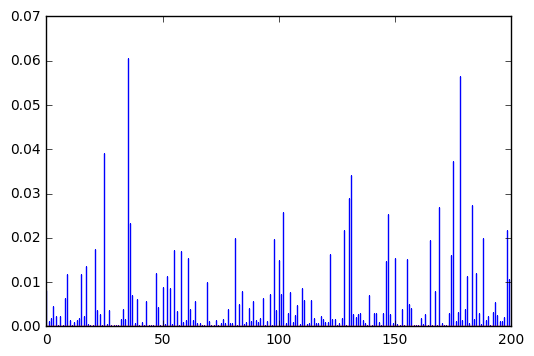

In [54]:
# few graphs on leverage
influence  = res.get_influence()
c,p = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

# TODO talk a little about the significance of the graph below

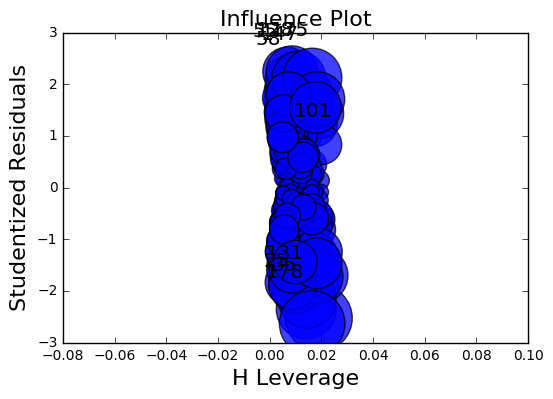

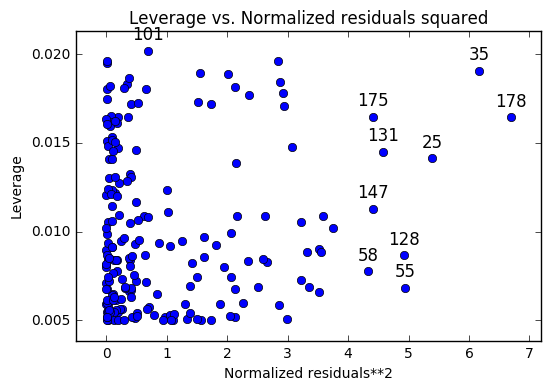

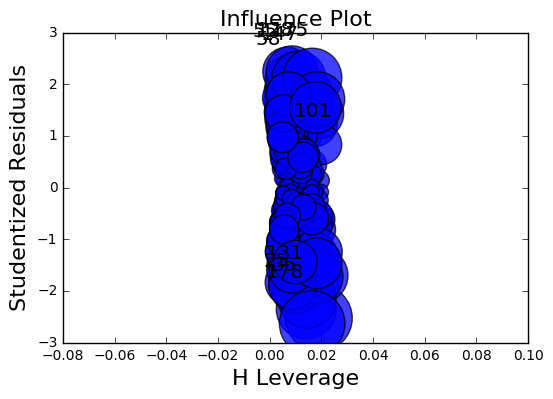

In [60]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot
plot_leverage_resid2(res)
influence_plot(res)
# TODO talk about these incontext of outlier analysis
# TODO also figure out why dup graphs

A residual standard error value of 3.259 means the on average the actual sales will deviate from the (true?) regression line by 3.26 unitsm



### $ R^2 $

R-squared is a value between 0 and 1 which indicates what percentage of the variance is explained by the model. An R-squared value of 1 means that the model perfectly captures all the varience - including the irreducible errors (or that the irreducible error is 0), which is noise one usually should not be able to capture. It can also be thought of as the relationship between the predictor and the response.

### Adjusted $ R^2 $

Adjusted R-squared is the R squared statistic while controlling for the number of predictors in the model. While not relevant to simple linear regression, it is an important concept for multiple linear regression. Thus we will cover it on a later date

In [10]:
credit_data = pd.read_csv('../input/Credit.csv')
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [11]:
credit_data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


TypeError: Input must be a 2D array.

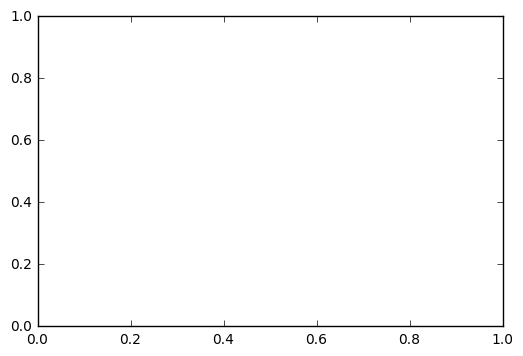

In [62]:
# lets do some graphs to show colinearity and explain its dangers
# TODO finish this off
# need to calculate the rss of regression model using (age and limit) and (rating and limit)
# plt.contour(credit_data['Age'], credit_data['Limit'], )

Collinearity refers to the case when two or more features are linked to one another.


In [72]:
# TODO calculate VIF

# TODO calculate the t and f statistics by hand to better understand which variance to u

NameError: name 'auto_df' is not defined